In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from env import user, password, host

In [21]:
# just to note everything is a mess atm 

In [ ]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [ ]:
def get_new_zillow_data():
    """Returns a dataframe of all 2017 properties that are Single Family Residential"""

    sql = '''Select bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, transactiondate from properties_2017
join propertylandusetype using (propertylandusetypeid)
join predictions_2017 using (parcelid)
where propertylandusedesc = "Single Family Residential"
AND predictions_2017.transactiondate like '2017%%'
'''
    return pd.read_sql(sql, get_connection("zillow"))


In [ ]:
get_new_zillow_data()

- DATA Wrangling aquireing the data 

In [ ]:
sql = '''Select bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, transactiondate from properties_2017
join propertylandusetype using (propertylandusetypeid)
join predictions_2017 using (parcelid)
where propertylandusedesc = "Single Family Residential"
AND predictions_2017.transactiondate like '2017%%'
'''

df = pd.read_sql(sql, get_connection("zillow"))
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns[df.isnull().any()]

In [ ]:
df = df.dropna()

- there is 52k people in this dataset i think losing like 200 is okay :)

In [ ]:
df.info()

In [ ]:
def optimize_types(df):
    # Convert some columns to integers
    # fips, yearbuilt, and bedrooms can be integers
    df["fips"] = df["fips"].astype(int)
    df["yearbuilt"] = df["yearbuilt"].astype(int)
    df["bedroomcnt"] = df["bedroomcnt"].astype(int)    
    df["taxvaluedollarcnt"] = df["taxvaluedollarcnt"].astype(int)
    df["calculatedfinishedsquarefeet"] = df["calculatedfinishedsquarefeet"].astype(int)
    return df

In [ ]:
optimize_types(df)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

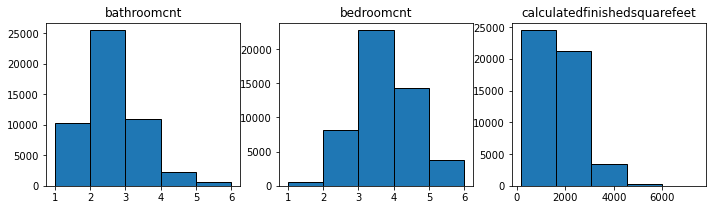

In [29]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',]

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,4, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

In [ ]:
df.fips.value_counts()

In [ ]:
df['County'] = df.fips.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})

df.head()

In [ ]:
def fix_fips(df):
    df['County'] = df.fips.map({6037:'Los Angeles County', 6059:'Orange County', 6111:'Ventura County'})
    return df


In [ ]:
fix_fips(df)

In [ ]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-------------------------------")

In [ ]:
#im just going to look and everything and see what i can remove as outliers 

In [ ]:
sns.countplot(x='bedroomcnt', data = df)

In [ ]:
df.bedroomcnt.value_counts()

In [ ]:
df.bedroomcnt.sort_values(ascending=False).head(30)

In [ ]:
# What percentage of properties have 6 or less bedrooms?
#so i could drop anything less than 6 
df[df.bedroomcnt <= 6].shape[0] / df.shape[0]

In [ ]:
df = df[df.bedroomcnt <= 6]

In [ ]:
df.shape

In [ ]:
#now imma look at the bathrooms 

In [ ]:
sns.countplot(x='bathroomcnt', data = df)

In [ ]:
df.bathroomcnt.sort_values(ascending=False).head(30)
#10 Bathrooms LOL 

In [ ]:
df[df.bathroomcnt <= 6].shape[0] / df.shape[0]

In [ ]:
df = df[df.bathroomcnt <= 6]

In [ ]:
df.shape

In [ ]:
#okay recap bathroom and bedrrom have been rehsaped 
#bathroom all the ones greater than 6 
#bedroom all the ones greater than 6 

In [ ]:
# What percentage of properties are less than $1.5m in tax value?
df[df.taxvaluedollarcnt < 1_500_000].shape[0] / df.shape[0]


In [ ]:
df = df[df.taxvaluedollarcnt < 1_500_000]

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
sns.countplot(x='bathroomcnt', data = df)

In [ ]:
sns.countplot(x='bedroomcnt', data = df)

In [ ]:
#sns.countplot(x='taxvaluedollarcnt', data = df)
#LOL ignore this plz 

In [ ]:
# think removing the zero bedrrom and maybe zero bathroom would be good 

In [ ]:
df[df.bathroomcnt != 0].shape[0] / df.shape[0]
#still keep 99 of recrods :] 

In [ ]:
df = df[df.bathroomcnt != 0]

In [ ]:
df.shape

In [ ]:
df[df.bedroomcnt != 0].shape[0] / df.shape[0]

In [ ]:
df = df[df.bedroomcnt != 0]

In [ ]:
df.shape

In [22]:
from wrangle import wrangle_zillow

In [23]:
df = wrangle_zillow()

df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,transactiondate,County
0,2.5,2,1348,343967,1979,3628.14,6059,2017-01-12,Orange County
1,2.0,3,1221,367034,1955,4589.60,6059,2017-01-12,Orange County
2,2.0,3,1462,79713,1950,1269.65,6037,2017-01-12,Los Angeles County
3,1.0,2,768,270458,1926,3373.09,6037,2017-01-12,Los Angeles County
4,4.0,4,3696,940251,1989,10313.18,6037,2017-01-12,Los Angeles County


In [24]:
df.shape

(49593, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49593 entries, 0 to 49592
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   49593 non-null  float64
 1   bedroomcnt                    49593 non-null  int64  
 2   calculatedfinishedsquarefeet  49593 non-null  int64  
 3   taxvaluedollarcnt             49593 non-null  int64  
 4   yearbuilt                     49593 non-null  int64  
 5   taxamount                     49593 non-null  float64
 6   fips                          49593 non-null  int64  
 7   transactiondate               49593 non-null  object 
 8   County                        49593 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 3.8+ MB


In [10]:
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
transactiondate                 0
County                          0
dtype: int64

the wrangling of the data in the kalpana dataset is good too go all i would need to do is add the edits to aquire the data, 

In [ ]:
# def handle_outliers(df):
#     """Manually handle outliers that do not represent properties likely for 99% of buyers and zillow visitors"""
#     df = df[df.bathroomcnt <= 6]
    
#     df = df[df.bedroomcnt <= 6]

#     df = df[df.taxvaluedollarcnt < 1_500_000]

#     return df

In [26]:
from sklearn.model_selection import train_test_split

In [25]:
import prepare

In [8]:
#train, validate, test = prepare.train_validate_test_split('df')

#this is not the right way to call the function 

AttributeError: 'str' object has no attribute 'fips'

In [27]:
train, validate, test = train_validate_test_split(df)

train.shape, validate.shape, test.shape

((17357, 9), (17358, 9), (14878, 9))

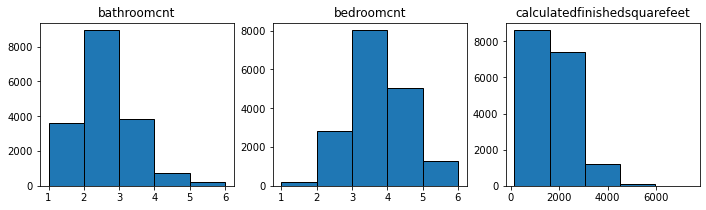

In [28]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',]

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,4, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    train[col].hist(bins=5, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)